In [1]:
import pandas as pd
import numpy
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# import matplotlib.pyplot as plt



import pandas as pd
import numpy as np

# import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

2023-08-10 15:44:50.973732: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
features = ['frame.interface_id',
 'frame.dlt',
 'frame.offset_shift',
 'frame.time_epoch',
 'frame.time_delta',
 'frame.time_delta_displayed',
 'frame.time_relative',
 'frame.len',
 'frame.cap_len',
 'frame.marked',
 'frame.ignored',
 'radiotap.version',
 'radiotap.pad',
 'radiotap.length',
 'radiotap.present.tsft',
 'radiotap.present.flags',
 'radiotap.present.rate',
 'radiotap.present.channel',
 'radiotap.present.fhss',
 'radiotap.present.dbm_antsignal',
 'radiotap.present.dbm_antnoise',
 'radiotap.present.lock_quality',
 'radiotap.present.tx_attenuation',
 'radiotap.present.db_tx_attenuation',
 'radiotap.present.dbm_tx_power',
 'radiotap.present.antenna',
 'radiotap.present.db_antsignal',
 'radiotap.present.db_antnoise',
 'radiotap.present.rxflags',
 'radiotap.present.xchannel',
 'radiotap.present.mcs',
 'radiotap.present.ampdu',
 'radiotap.present.vht',
 'radiotap.present.reserved',
 'radiotap.present.rtap_ns',
 'radiotap.present.vendor_ns',
 'radiotap.present.ext',
 'radiotap.mactime',
 'radiotap.flags.cfp',
 'radiotap.flags.preamble',
 'radiotap.flags.wep',
 'radiotap.flags.frag',
 'radiotap.flags.fcs',
 'radiotap.flags.datapad',
 'radiotap.flags.badfcs',
 'radiotap.flags.shortgi',
 'radiotap.datarate',
 'radiotap.channel.freq',
 'radiotap.channel.type.turbo',
 'radiotap.channel.type.cck',
 'radiotap.channel.type.ofdm',
 'radiotap.channel.type.2ghz',
 'radiotap.channel.type.5ghz',
 'radiotap.channel.type.passive',
 'radiotap.channel.type.dynamic',
 'radiotap.channel.type.gfsk',
 'radiotap.channel.type.gsm',
 'radiotap.channel.type.sturbo',
 'radiotap.channel.type.half',
 'radiotap.channel.type.quarter',
 'radiotap.dbm_antsignal',
 'radiotap.antenna',
 'radiotap.rxflags.badplcp',
 'wlan.fc.type_subtype',
 'wlan.fc.version',
 'wlan.fc.type',
 'wlan.fc.subtype',
 'wlan.fc.ds',
 'wlan.fc.frag',
 'wlan.fc.retry',
 'wlan.fc.pwrmgt',
 'wlan.fc.moredata',
 'wlan.fc.protected',
 'wlan.fc.order',
 'wlan.duration',
 'wlan.ra',
 'wlan.da',
 'wlan.ta',
 'wlan.sa',
 'wlan.bssid',
 'wlan.frag',
 'wlan.seq',
 'wlan.bar.type',
 'wlan.ba.control.ackpolicy',
 'wlan.ba.control.multitid',
 'wlan.ba.control.cbitmap',
 'wlan.bar.compressed.tidinfo',
 'wlan.ba.bm',
 'wlan.fcs_good',
 'wlan_mgt.fixed.capabilities.ess',
 'wlan_mgt.fixed.capabilities.ibss',
 'wlan_mgt.fixed.capabilities.cfpoll.ap',
 'wlan_mgt.fixed.capabilities.privacy',
 'wlan_mgt.fixed.capabilities.preamble',
 'wlan_mgt.fixed.capabilities.pbcc',
 'wlan_mgt.fixed.capabilities.agility',
 'wlan_mgt.fixed.capabilities.spec_man',
 'wlan_mgt.fixed.capabilities.short_slot_time',
 'wlan_mgt.fixed.capabilities.apsd',
 'wlan_mgt.fixed.capabilities.radio_measurement',
 'wlan_mgt.fixed.capabilities.dsss_ofdm',
 'wlan_mgt.fixed.capabilities.del_blk_ack',
 'wlan_mgt.fixed.capabilities.imm_blk_ack',
 'wlan_mgt.fixed.listen_ival',
 'wlan_mgt.fixed.current_ap',
 'wlan_mgt.fixed.status_code',
 'wlan_mgt.fixed.timestamp',
 'wlan_mgt.fixed.beacon',
 'wlan_mgt.fixed.aid',
 'wlan_mgt.fixed.reason_code',
 'wlan_mgt.fixed.auth.alg',
 'wlan_mgt.fixed.auth_seq',
 'wlan_mgt.fixed.category_code',
 'wlan_mgt.fixed.htact',
 'wlan_mgt.fixed.chanwidth',
 'wlan_mgt.fixed.fragment',
 'wlan_mgt.fixed.sequence',
 'wlan_mgt.tagged.all',
 'wlan_mgt.ssid',
 'wlan_mgt.ds.current_channel',
 'wlan_mgt.tim.dtim_count',
 'wlan_mgt.tim.dtim_period',
 'wlan_mgt.tim.bmapctl.multicast',
 'wlan_mgt.tim.bmapctl.offset',
 'wlan_mgt.country_info.environment',
 'wlan_mgt.rsn.version',
 'wlan_mgt.rsn.gcs.type',
 'wlan_mgt.rsn.pcs.count',
 'wlan_mgt.rsn.akms.count',
 'wlan_mgt.rsn.akms.type',
 'wlan_mgt.rsn.capabilities.preauth',
 'wlan_mgt.rsn.capabilities.no_pairwise',
 'wlan_mgt.rsn.capabilities.ptksa_replay_counter',
 'wlan_mgt.rsn.capabilities.gtksa_replay_counter',
 'wlan_mgt.rsn.capabilities.mfpr',
 'wlan_mgt.rsn.capabilities.mfpc',
 'wlan_mgt.rsn.capabilities.peerkey',
 'wlan_mgt.tcprep.trsmt_pow',
 'wlan_mgt.tcprep.link_mrg',
 'wlan.wep.iv',
 'wlan.wep.key',
 'wlan.wep.icv',
 'wlan.tkip.extiv',
 'wlan.ccmp.extiv',
 'wlan.qos.tid',
 'wlan.qos.priority',
 'wlan.qos.eosp',
 'wlan.qos.ack',
 'wlan.qos.amsdupresent',
 'wlan.qos.buf_state_indicated1',
 'wlan.qos.bit4',
 'wlan.qos.txop_dur_req',
 'wlan.qos.buf_state_indicated2',
 'data.len',
 'class']

In [3]:
# from google.colab import drive
# drive.mount("/content/gdrive")

In [4]:
import pandas as pd
awid=pd.read_csv('AWID-CLS-R-Trn.csv',header=None,names=features)

/tmp/ipykernel_516373/3960476799.py:2: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types. Specify dtype option on import or set low_memory=False.
  awid=pd.read_csv('AWID-CLS-R-Trn.csv',header=None,names=features)


In [5]:
awid_test=pd.read_csv('AWID-CLS-R-Tst.csv',header=None,names=features)

/tmp/ipykernel_516373/1847660984.py:1: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types. Specify dtype option on import or set low_memory=False.
  awid_test=pd.read_csv('AWID-CLS-R-Tst.csv',header=None,names=features)


In [6]:
awid.head(n=10)


,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,...,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated1,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated2,data.len,class
0,0,?,0.0,1.393661e+09,0.000000,0.000000,0.000000,261,261,0,...,?,?,?,?,?,?,?,?,?,normal
1,0,?,0.0,1.393661e+09,0.024271,0.024271,0.024271,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
2,0,?,0.0,1.393661e+09,0.001631,0.001631,0.025902,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
3,0,?,0.0,1.393661e+09,0.055325,0.055325,0.081227,159,159,0,...,?,?,?,?,?,?,?,?,?,normal
4,0,?,0.0,1.393661e+09,0.000415,0.000415,0.081642,54,54,0,...,?,?,?,?,?,?,?,?,?,normal
5,0,?,0.0,1.393661e+09,0.000005,0.000005,0.081647,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
6,0,?,0.0,1.393661e+09,0.016692,0.016692,0.098339,261,261,0,...,?,?,?,?,?,?,?,?,?,normal
7,0,?,0.0,1.393661e+09,0.000142,0.000142,0.098481,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
8,0,?,0.0,1.393661e+09,0.028067,0.028067,0.126548,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
9,0,?,0.0,1.393661e+09,0.001801,0.001801,0.128349,185,185,0,...,?,?,?,?,?,?,?,?,?,normal


In [7]:
awid_test.head(n=10)

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,...,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated1,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated2,data.len,class
0,0,?,0.0,1.393668e+09,0.000000,0.000000,0.000000,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal
1,0,?,0.0,1.393668e+09,0.001056,0.001056,0.001056,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal
2,0,?,0.0,1.393668e+09,0.000141,0.000141,0.001197,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
3,0,?,0.0,1.393668e+09,0.000156,0.000156,0.001353,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
4,0,?,0.0,1.393668e+09,0.001842,0.001842,0.003195,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal
5,0,?,0.0,1.393668e+09,0.006015,0.006015,0.009210,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal
6,0,?,0.0,1.393668e+09,0.000940,0.000940,0.010150,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal
7,0,?,0.0,1.393668e+09,0.000459,0.000459,0.010609,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal
8,0,?,0.0,1.393668e+09,0.000824,0.000824,0.011433,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
9,0,?,0.0,1.393668e+09,0.000583,0.000583,0.012016,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal


In [8]:
for col in awid.columns:
    awid[col]=pd.to_numeric(awid[col], errors='ignore')

In [9]:
#To check for null columns

[col for col in awid.columns if awid[col].isnull().sum() > 0]

#it is zero so proceed

[]

In [10]:
for col in awid.columns:
  awid[col] = np.where(awid[col] == "?",-1,awid[col])



In [11]:
awid.head(n=11)

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,...,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated1,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated2,data.len,class
0,0,-1,0.0,1.393661e+09,0.000000,0.000000,0.000000,261,261,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
1,0,-1,0.0,1.393661e+09,0.024271,0.024271,0.024271,185,185,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
2,0,-1,0.0,1.393661e+09,0.001631,0.001631,0.025902,185,185,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
3,0,-1,0.0,1.393661e+09,0.055325,0.055325,0.081227,159,159,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
4,0,-1,0.0,1.393661e+09,0.000415,0.000415,0.081642,54,54,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
5,0,-1,0.0,1.393661e+09,0.000005,0.000005,0.081647,40,40,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
6,0,-1,0.0,1.393661e+09,0.016692,0.016692,0.098339,261,261,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
7,0,-1,0.0,1.393661e+09,0.000142,0.000142,0.098481,40,40,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
8,0,-1,0.0,1.393661e+09,0.028067,0.028067,0.126548,185,185,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
9,0,-1,0.0,1.393661e+09,0.001801,0.001801,0.128349,185,185,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal


In [12]:
for col in awid_test.columns:
    awid_test[col]=pd.to_numeric(awid_test[col], errors='ignore')

In [13]:
#To check for null columns

[col for col in awid_test.columns if awid_test[col].isnull().sum() > 0]

#it is zero so proceed

[]

In [14]:
for col in awid_test.columns:
  awid_test[col] = np.where(awid_test[col] == "?",-1,awid_test[col])

In [15]:
awid_test.head(n=10)

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,...,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated1,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated2,data.len,class
0,0,-1,0.0,1.393668e+09,0.000000,0.000000,0.000000,1552,1552,0,...,1,0,0x0000,0,-1,-1,-1,0,1488,normal
1,0,-1,0.0,1.393668e+09,0.001056,0.001056,0.001056,1552,1552,0,...,1,0,0x0000,0,-1,-1,-1,0,1488,normal
2,0,-1,0.0,1.393668e+09,0.000141,0.000141,0.001197,40,40,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
3,0,-1,0.0,1.393668e+09,0.000156,0.000156,0.001353,40,40,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
4,0,-1,0.0,1.393668e+09,0.001842,0.001842,0.003195,1552,1552,0,...,1,0,0x0000,0,-1,-1,-1,0,1488,normal
5,0,-1,0.0,1.393668e+09,0.006015,0.006015,0.009210,1552,1552,0,...,1,0,0x0000,0,-1,-1,-1,0,1488,normal
6,0,-1,0.0,1.393668e+09,0.000940,0.000940,0.010150,1552,1552,0,...,1,0,0x0000,0,-1,-1,-1,0,1488,normal
7,0,-1,0.0,1.393668e+09,0.000459,0.000459,0.010609,1552,1552,0,...,1,0,0x0000,0,-1,-1,-1,0,1488,normal
8,0,-1,0.0,1.393668e+09,0.000824,0.000824,0.011433,40,40,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
9,0,-1,0.0,1.393668e+09,0.000583,0.000583,0.012016,1552,1552,0,...,1,0,0x0000,0,-1,-1,-1,0,1488,normal


In [16]:
# X_train, y_train = awid.select_dtypes(['int']), awid['class']

X_train,y_train=awid.iloc[:,:-1],awid.iloc[:,-1]
X_train.shape
y_train.shape


(1795575,)

In [17]:
y_train.value_counts()

normal           1633190
injection          65379
impersonation      48522
flooding           48484
Name: class, dtype: int64

In [18]:
# X_train.value_counts()

In [19]:
X_train.shape


(1795575, 154)

In [20]:
y_train.shape

(1795575,)

In [21]:
# X_test, y_test = awid_test.select_dtypes(['number']), awid_test['class']

X_test,y_test=awid_test.iloc[:,:-1],awid_test.iloc[:,-1]
X_test.shape
y_test.shape


(575643,)

In [22]:
y_test.value_counts()

normal           530785
impersonation     20079
injection         16682
flooding           8097
Name: class, dtype: int64

In [23]:
# X_test.value_counts()

In [24]:
X_test.shape


(575643, 154)

In [25]:
y_test.shape

(575643,)

In [26]:
# Keep a copy of the dataset with all the variables
# to measure the performance of machine learning models
# at the end of the notebook

X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [27]:
cols=[]
for i in range(len(X_train.columns)):
    if str(type(X_train.iloc[0,i]))=="<class 'str'>":
        print(X_train.columns[i],X_train.iloc[0,i],type(X_train.iloc[0,i]))
    else:
        cols.append(X_train.columns[i])

radiotap.present.reserved 0x00000000 <class 'str'>
radiotap.mactime 2101598203 <class 'str'>
radiotap.flags.cfp 0 <class 'str'>
radiotap.flags.preamble 0 <class 'str'>
radiotap.flags.wep 0 <class 'str'>
radiotap.flags.frag 0 <class 'str'>
radiotap.flags.fcs 1 <class 'str'>
radiotap.flags.datapad 0 <class 'str'>
radiotap.flags.badfcs 0 <class 'str'>
radiotap.flags.shortgi 0 <class 'str'>
radiotap.channel.freq 2437 <class 'str'>
radiotap.channel.type.turbo 0 <class 'str'>
radiotap.channel.type.cck 1 <class 'str'>
radiotap.channel.type.ofdm 0 <class 'str'>
radiotap.channel.type.2ghz 1 <class 'str'>
radiotap.channel.type.5ghz 0 <class 'str'>
radiotap.channel.type.passive 0 <class 'str'>
radiotap.channel.type.dynamic 0 <class 'str'>
radiotap.channel.type.gfsk 0 <class 'str'>
radiotap.channel.type.gsm 0 <class 'str'>
radiotap.channel.type.sturbo 0 <class 'str'>
radiotap.channel.type.half 0 <class 'str'>
radiotap.channel.type.quarter 0 <class 'str'>
radiotap.dbm_antsignal -47 <class 'str'>
ra

In [28]:
for i in range(len(cols)):
    if str(type(X_train.loc[0,cols[i]]))=="<class 'str'>":
        print(X_train.columns[i],X_train.iloc[0,i],type(X_train.iloc[0,i]))
#     else:
#         cols.append(X_train.columns[i])

### **Removing Cinstant features**

In [29]:

# constant_features = [
#     feat for feat in cols1 if X_train[feat].std() == 0
# ]
cols1=[]
for feat in cols:
    if str(type(X_train.loc[1,feat]))=="<class 'str'>":
        print(feat, X_train.loc[1,feat])
        print(type(X_train.loc[1,feat]))
    else:
        cols1.append(feat)


wlan_mgt.rsn.version 1
<class 'str'>
wlan_mgt.rsn.gcs.type 2
<class 'str'>
wlan_mgt.rsn.pcs.count 2
<class 'str'>
wlan_mgt.rsn.akms.count 1
<class 'str'>
wlan_mgt.rsn.akms.type 2
<class 'str'>
wlan_mgt.rsn.capabilities.preauth 0
<class 'str'>
wlan_mgt.rsn.capabilities.no_pairwise 0
<class 'str'>
wlan_mgt.rsn.capabilities.ptksa_replay_counter 0x0000
<class 'str'>
wlan_mgt.rsn.capabilities.gtksa_replay_counter 0x0000
<class 'str'>
wlan_mgt.rsn.capabilities.mfpr 0
<class 'str'>
wlan_mgt.rsn.capabilities.mfpc 0
<class 'str'>
wlan_mgt.rsn.capabilities.peerkey 0
<class 'str'>


In [30]:
constant_features=[]
str_col=[]
for feat in cols1:
    try:
        if X_train[feat].std() == 0:
            constant_features.append(feat)
    except:
        print(feat)
        str_col.append(feat)

wlan.bar.type
wlan.ba.control.ackpolicy
wlan.ba.control.multitid
wlan.ba.control.cbitmap
wlan.bar.compressed.tidinfo
wlan.ba.bm
wlan_mgt.fixed.listen_ival
wlan_mgt.fixed.current_ap
wlan_mgt.fixed.status_code
wlan_mgt.fixed.aid
wlan_mgt.fixed.reason_code
wlan_mgt.fixed.auth.alg
wlan_mgt.fixed.auth_seq
wlan_mgt.fixed.category_code
wlan_mgt.fixed.htact
wlan_mgt.fixed.chanwidth
wlan_mgt.fixed.fragment
wlan_mgt.fixed.sequence
wlan_mgt.country_info.environment
wlan_mgt.tcprep.trsmt_pow
wlan_mgt.tcprep.link_mrg
wlan.wep.iv
wlan.wep.key
wlan.wep.icv
wlan.tkip.extiv
wlan.ccmp.extiv
wlan.qos.tid
wlan.qos.priority
wlan.qos.eosp
wlan.qos.ack
wlan.qos.amsdupresent
wlan.qos.bit4
wlan.qos.txop_dur_req
wlan.qos.buf_state_indicated2
data.len


In [31]:
# remove constant features

X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((1795575, 128), (575643, 128))

### **Removing Quasi cnstant features**

In [32]:
# # remove quasi-constant features
# # 0.1 indicates 99% of observations approximately
# sel = VarianceThreshold(threshold=0.01)  
# # fit finds the features with low variance
# sel.fit(X_train)  
# # how many not quasi-constant?
# sum(sel.get_support()) 

In [33]:
# features_to_keep = X_train.columns[sel.get_support()]
# # we can then remove the features like this
# X_train = sel.transform(X_train)
# X_test = sel.transform(X_test)

# X_train.shape, X_test.shape

In [34]:
# # sklearn transformations lead to numpy arrays
# # here we transform the arrays back to dataframes
# # please be mindful of getting the columns assigned
# # correctly

# X_train= pd.DataFrame(X_train)
# X_train.columns = features_to_keep

# X_test= pd.DataFrame(X_test)
# X_test.columns = features_to_keep

### **Removing dupliacted features**

In [35]:
# check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10
20
30
40
50
60
70
80
90
100
110
120


162

In [36]:
# remove duplicated features
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

((1795575, 99), (575643, 99))

In [37]:
# Keep a copy of the dataset except constant and duplicated variables
# to measure the performance of machine learning models
# at the end of the notebook

X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

### **Removing correlated features**

In [38]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

/tmp/ipykernel_516373/138991656.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


correlated features:  3


In [39]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((1795575, 96), (575643, 96))

In [40]:
# keep a copy of the dataset at  this stage
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

In [41]:
# find important features using univariate roc-auc

# loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set
str_feat=[]
roc_values = []
for feature in X_train.columns:
    try:
        clf = DecisionTreeClassifier()
        clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
        y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    except:
        str_feat.append(feature)
    # roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

In [42]:
use_col=[feat for feat in X_train.columns if feat not in str_feat]
x_train=X_train[use_col]
x_test=X_test[use_col]

In [43]:
len(use_col)

65

### **Data preprocessing**

In [44]:
sc=StandardScaler()
sc.fit(x_train)
scaled_X_train=sc.transform(x_train)

sc1=StandardScaler()
sc1.fit(x_test)
scaled_X_test=sc1.transform(x_test)

### **Encoding**

In [45]:
encoder = LabelEncoder()
encoded_y=encoder.fit_transform(y_train)
enc_y_test=encoder.fit_transform(y_test)

In [46]:
encoded_y

array([3, 3, 3, ..., 3, 3, 3])

In [47]:
encoder.classes_

array(['flooding', 'impersonation', 'injection', 'normal'], dtype=object)

In [48]:
encoded_y

array([3, 3, 3, ..., 3, 3, 3])

In [49]:
enc_y_test

array([3, 3, 3, ..., 3, 3, 3])

In [50]:
X_train=x_train
X_test=x_test

<h2>Classification Machine Learning Algorithm </h2>

In [51]:
# def model_accuracy(model):
#     y_preds=model.predict(X_test)
#     return accuracy_score(y_test, y_preds)

In [52]:
X_test.shape,y_test.shape

((575643, 65), (575643,))

In [53]:
def model_accuracy(model):
    y_preds=model.predict(X_test)
    ac=0
    for i in range(len(y_preds)):
        if y_preds[i]==y_test[i]:
            ac+=1
    return ac/len(y_test)

In [54]:
#Performed well after feature elimination,working with 8 features now
import time

start = time.time()


lr=LogisticRegression()
lr.fit(X_train, y_train)
print(model_accuracy(lr))

end = time.time()

print("Runtime of the program is",end-start)


0.01451767849170406
Runtime of the program is 28.96305012702942


In [55]:
y_pred_lr = lr.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred_lr,labels=["normal", "impersonation", "flooding", "injection"])
cm

array([[   260,      0, 530525,      0],
       [     0,      0,  20079,      0],
       [     0,      0,   8097,      0],
       [     0,      0,  16682,      0]])

In [57]:
import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.metrics import confusion_matrix
# sklearn.metrics.plot_confusion_matrix(lr, X_test, y_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred_lr,labels=["normal", "impersonation", "flooding", "injection"])


In [58]:
cm_df = pd.DataFrame(cm,
                     index = ["normal", "impersonation", "flooding", "injection"], 
                     columns = ["normal", "impersonation", "flooding", "injection"])

cm_df

,normal,impersonation,flooding,injection
normal,260,0,530525,0
impersonation,0,0,20079,0
flooding,0,0,8097,0
injection,0,0,16682,0


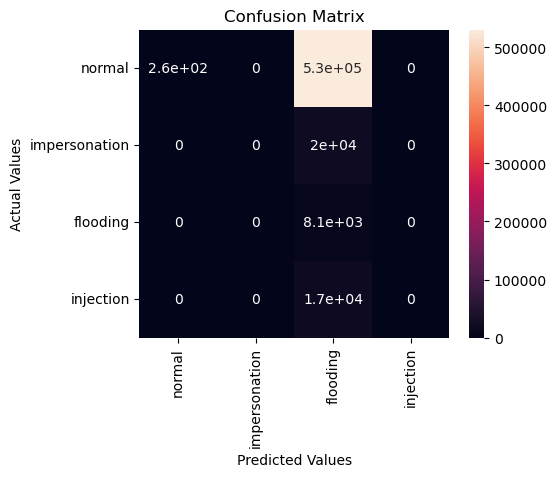

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [60]:
 print(classification_report(y_test, y_pred_lr, target_names=["normal", "impersonation", "flooding", "injection"]))

/DATA/sofia_2111cs15/anaconda3/envs/sofiaj/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/DATA/sofia_2111cs15/anaconda3/envs/sofiaj/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

       normal       0.01      1.00      0.03      8097
impersonation       0.00      0.00      0.00     20079
     flooding       0.00      0.00      0.00     16682
    injection       1.00      0.00      0.00    530785

     accuracy                           0.01    575643
    macro avg       0.25      0.25      0.01    575643
 weighted avg       0.92      0.01      0.00    575643



/DATA/sofia_2111cs15/anaconda3/envs/sofiaj/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
y_train

0          normal
1          normal
2          normal
3          normal
4          normal
            ...  
1795570    normal
1795571    normal
1795572    normal
1795573    normal
1795574    normal
Name: class, Length: 1795575, dtype: object

In [62]:
# Decision Tree Algorithm
start_dt = time.time()
tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)
print(model_accuracy(tree))

end_dt = time.time()

print('time taken is',end_dt-start_dt)


0.9406646133106804
time taken is 14.79571795463562


In [63]:
y_pred_dt = tree.predict(X_test)

In [64]:

 
cm = confusion_matrix(y_test,y_pred_dt,labels=["normal", "impersonation", "flooding", "injection"])
cm

array([[523840,     54,      4,   6887],
       [  1197,    276,      0,  18606],
       [  3779,   1158,   3160,      0],
       [  2471,      0,      0,  14211]])

In [65]:
cm_df = pd.DataFrame(cm,
                     index = ["normal", "impersonation", "flooding", "injection"], 
                     columns = ["normal", "impersonation", "flooding", "injection"])

cm_df

,normal,impersonation,flooding,injection
normal,523840,54,4,6887
impersonation,1197,276,0,18606
flooding,3779,1158,3160,0
injection,2471,0,0,14211


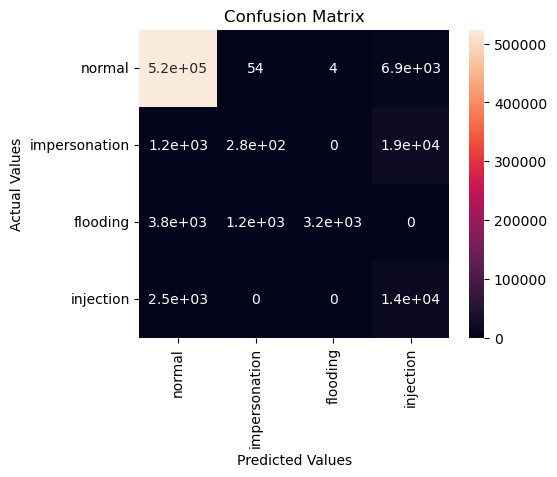

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [67]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(tree, X_test, y_test)  
# plt.show()

In [68]:
 print(classification_report(y_test, y_pred_dt, target_names=["normal", "impersonation", "flooding", "injection"]))

               precision    recall  f1-score   support

       normal       1.00      0.39      0.56      8097
impersonation       0.19      0.01      0.03     20079
     flooding       0.36      0.85      0.50     16682
    injection       0.99      0.99      0.99    530785

     accuracy                           0.94    575643
    macro avg       0.63      0.56      0.52    575643
 weighted avg       0.94      0.94      0.93    575643



In [69]:
#Random Forest Classifier 
start_rf=time.time()
forest=RandomForestClassifier()
forest.fit(X_train,y_train)
print(model_accuracy(forest))

end_rf=time.time()

print('time taken rf',end_rf-start_rf)

0.9413646999963519
time taken rf 95.00311708450317


In [70]:
y_pred_rf = forest.predict(X_test)

In [71]:
cm = confusion_matrix(y_test,y_pred_rf,labels=["normal", "impersonation", "flooding", "injection"])
cm

array([[530093,      9,      0,    683],
       [    88,   1446,      0,  18545],
       [  5438,      0,   2659,      0],
       [  8990,      0,      0,   7692]])

In [72]:
cm_df = pd.DataFrame(cm,
                     index = ["normal", "impersonation", "flooding", "injection"], 
                     columns = ["normal", "impersonation", "flooding", "injection"])

cm_df

,normal,impersonation,flooding,injection
normal,530093,9,0,683
impersonation,88,1446,0,18545
flooding,5438,0,2659,0
injection,8990,0,0,7692


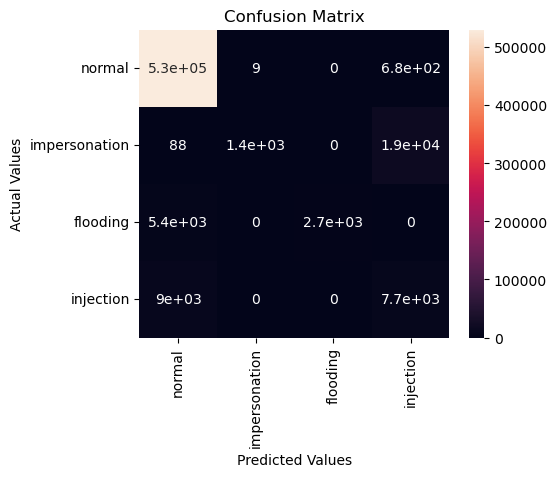

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [74]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(forest, X_test, y_test)  
# plt.show()

In [75]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(forest, X_test, y_test)  
# plt.show()

In [76]:
 print(classification_report(y_test, y_pred_rf, target_names=["normal", "impersonation", "flooding", "injection"]))

               precision    recall  f1-score   support

       normal       1.00      0.33      0.49      8097
impersonation       0.99      0.07      0.13     20079
     flooding       0.29      0.46      0.35     16682
    injection       0.97      1.00      0.99    530785

     accuracy                           0.94    575643
    macro avg       0.81      0.47      0.49    575643
 weighted avg       0.95      0.94      0.93    575643



In [77]:
# from sklearn.svm import SVC
# svclassifier_rbf = SVC(kernel='rbf')
# svclassifier_rbf.fit(X_train, y_train)
# # prediction_svmrbf = svclassifier_rbf.predict(X_test)
# # accuracy_svmrbf=sum([1 for i in range(len(X_test)) if y_test[i]==prediction_svmrbf[i]])/len(X_test)
# # print(accuracy_svmrbf)
# # print(classification_report(y_test,prediction_svmrbf))
# model_accuracy(svclassifier_rbf)

In [78]:
#adaboost is performing bad

start_ab=time.time()

from sklearn.ensemble import AdaBoostClassifier
boost=AdaBoostClassifier()
boost.fit(X_train,y_train)
print(model_accuracy(boost))

end_ab = time.time()

print('time taken by adaboost',end_ab-start_ab)

0.605363046193561
time taken by adaboost 600.0844995975494


In [79]:
y_pred_ab=boost.predict(X_test)

In [80]:
cm = confusion_matrix(y_test,y_pred_ab,labels=["normal", "impersonation", "flooding", "injection"])
cm

array([[345913,      0, 184872,      0],
       [ 20079,      0,      0,      0],
       [  5537,      0,   2560,      0],
       [ 16656,      0,     26,      0]])

In [81]:
cm_df = pd.DataFrame(cm,
                     index = ["normal", "impersonation", "flooding", "injection"], 
                     columns = ["normal", "impersonation", "flooding", "injection"])

cm_df

,normal,impersonation,flooding,injection
normal,345913,0,184872,0
impersonation,20079,0,0,0
flooding,5537,0,2560,0
injection,16656,0,26,0


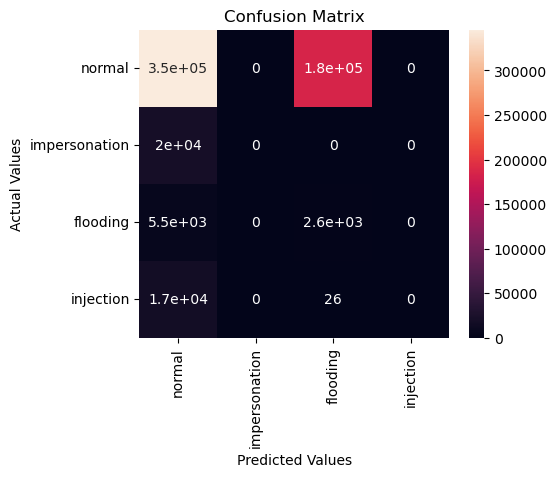

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [83]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(boost, X_test, y_test)  
# plt.show()

In [84]:
 print(classification_report(y_test, y_pred_ab, target_names=["normal", "impersonation", "flooding", "injection"]))

/DATA/sofia_2111cs15/anaconda3/envs/sofiaj/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/DATA/sofia_2111cs15/anaconda3/envs/sofiaj/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

       normal       0.01      0.32      0.03      8097
impersonation       0.00      0.00      0.00     20079
     flooding       0.00      0.00      0.00     16682
    injection       0.89      0.65      0.75    530785

     accuracy                           0.61    575643
    macro avg       0.23      0.24      0.19    575643
 weighted avg       0.82      0.61      0.69    575643



/DATA/sofia_2111cs15/anaconda3/envs/sofiaj/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
import time

start_gb=time.time()

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
print(model_accuracy(gnb))

end_gb=time.time()
      
print('time taken by gb',end_gb-start_gb)

0.9220732294147588
time taken by gb 13.015738248825073


In [86]:
y_pred_gnb=gnb.predict(X_test)

In [87]:
cm = confusion_matrix(y_test,y_pred_gnb,labels=["normal", "impersonation", "flooding", "injection"])
cm

array([[530785,      0,      0,      0],
       [ 20079,      0,      0,      0],
       [  8097,      0,      0,      0],
       [ 16682,      0,      0,      0]])

In [88]:
cm_df = pd.DataFrame(cm,
                     index = ["normal", "impersonation", "flooding", "injection"], 
                     columns = ["normal", "impersonation", "flooding", "injection"])

cm_df

,normal,impersonation,flooding,injection
normal,530785,0,0,0
impersonation,20079,0,0,0
flooding,8097,0,0,0
injection,16682,0,0,0


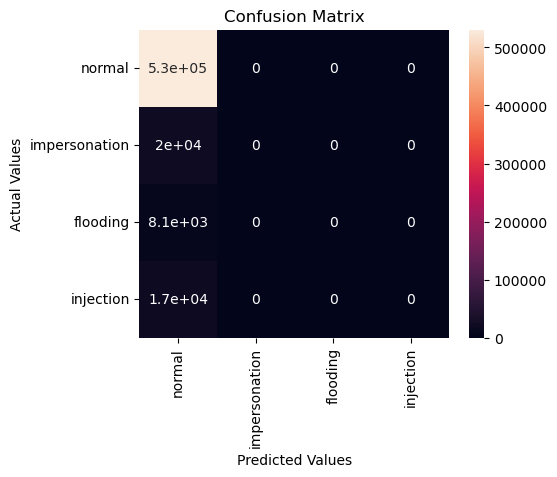

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [90]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(gnb, X_test, y_test)  
# plt.show()

In [91]:
 print(classification_report(y_test, y_pred_gnb, target_names=["normal", "impersonation", "flooding", "injection"]))

/DATA/sofia_2111cs15/anaconda3/envs/sofiaj/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/DATA/sofia_2111cs15/anaconda3/envs/sofiaj/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

       normal       0.00      0.00      0.00      8097
impersonation       0.00      0.00      0.00     20079
     flooding       0.00      0.00      0.00     16682
    injection       0.92      1.00      0.96    530785

     accuracy                           0.92    575643
    macro avg       0.23      0.25      0.24    575643
 weighted avg       0.85      0.92      0.88    575643



/DATA/sofia_2111cs15/anaconda3/envs/sofiaj/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
from sklearn.dummy import DummyClassifier
dummy=DummyClassifier()
dummy.fit(X_train,y_train)
y_pred_dmy=dummy.predict(X_test)
model_accuracy(dummy)

0.9220732294147588

In [93]:
cm = confusion_matrix(y_test,y_pred_dmy,labels=["normal", "impersonation", "flooding", "injection"])
cm

array([[530785,      0,      0,      0],
       [ 20079,      0,      0,      0],
       [  8097,      0,      0,      0],
       [ 16682,      0,      0,      0]])

In [94]:
cm_df = pd.DataFrame(cm,
                     index = ["normal", "impersonation", "flooding", "injection"], 
                     columns = ["normal", "impersonation", "flooding", "injection"])

cm_df

,normal,impersonation,flooding,injection
normal,530785,0,0,0
impersonation,20079,0,0,0
flooding,8097,0,0,0
injection,16682,0,0,0


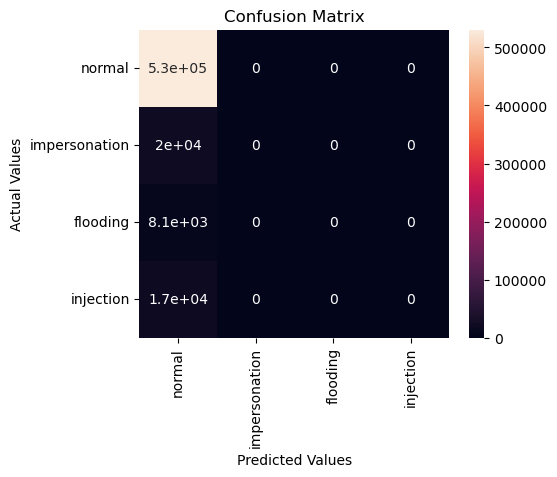

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [96]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(dummy, X_test, y_test)  
# plt.show()

In [97]:
 print(classification_report(y_test, y_pred_dmy, target_names=["normal", "impersonation", "flooding", "injection"]))

/DATA/sofia_2111cs15/anaconda3/envs/sofiaj/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/DATA/sofia_2111cs15/anaconda3/envs/sofiaj/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

       normal       0.00      0.00      0.00      8097
impersonation       0.00      0.00      0.00     20079
     flooding       0.00      0.00      0.00     16682
    injection       0.92      1.00      0.96    530785

     accuracy                           0.92    575643
    macro avg       0.23      0.25      0.24    575643
 weighted avg       0.85      0.92      0.88    575643



/DATA/sofia_2111cs15/anaconda3/envs/sofiaj/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
start_knn=time.time()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)
print(model_accuracy(knn))

end_knn = time.time()

print('time taken by knn',end_knn-start_knn)

In [ ]:
cm = confusion_matrix(y_test,y_pred_knn,labels=["normal", "impersonation", "flooding", "injection"])
cm

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ["normal", "impersonation", "flooding", "injection"], 
                     columns = ["normal", "impersonation", "flooding", "injection"])

cm_df

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(knn, X_test, y_test)  
# plt.show()

In [ ]:
 print(classification_report(y_test, y_pred_knn, target_names=["normal", "impersonation", "flooding", "injection"],zero_division=0))

In [ ]:
start_bnb=time.time()

from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB(binarize=0.0)
model.fit(X_train, y_train)
print(model_accuracy(model))

end_bnb = time.time()

print('time taken by',end_bnb-start_bnb)

In [ ]:
y_pred_bnb=model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred_bnb,labels=["normal", "impersonation", "flooding", "injection"])
cm

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ["normal", "impersonation", "flooding", "injection"], 
                     columns = ["normal", "impersonation", "flooding", "injection"])

cm_df

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
 print(classification_report(y_test, y_pred_bnb, target_names=["normal", "impersonation", "flooding", "injection"]))

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(model, X_test, y_test)  
# plt.show()

In [ ]:
#converting series to list

# y_train.value_counts()

# series_y_train = pd.Series(encoded_y) 

# print(type(y_train),type(series_y_train))

# series_y_train.value_counts()



### **To compare the model performance without feature elimination**

In [ ]:
# def model_accuracy_origi(model):
#     y_preds1=model.predict(X_test_original)
#     return accuracy_score(y_test, y_preds1)

In [ ]:

# lr1=LogisticRegression()
# lr1.fit(X_train_original, y_train)
# model_accuracy_origi(lr1)

In [ ]:
# X_test_original.shape
# X_train_original.shape

In [ ]:
# # Decision Tree Algorithm
# tree=DecisionTreeClassifier()
# tree.fit(X_train_original, y_train)
# model_accuracy_origi(tree)

In [ ]:
# #Random Forest Classifier 
# forest=RandomForestClassifier()
# forest.fit(X_train_original,y_train)
# model_accuracy_origi(forest)

In [ ]:
# Import pandas package
import pandas as pd

# Define a dictionary containing employee data
data = {'Name':['Jai', 'Princi', 'Gaurav', 'Anuj'],
		'Age':[27.8, 24.5, 22, 32],
		'Address':['Delhi', 'Kanpur', 'Allahabad', 'Kannauj'],
		'Qualification':['Msc', 'MA', 'MCA', 'Phd']
	}
# Convert the dictionary into DataFrame
df = pd.DataFrame(data)

# .loc DataFrame method
# filtering rows and selecting columns by label
# format
# df.loc[rows, columns]
# row 1, all columns
df


In [ ]:

for i in range(len(df.columns)):
    if str(type(df.iloc[0,i]))=="<class 'numpy.int64'>":
        print('integer')
    else:
        print('not integre')
        s=df.columns[i]
        a=df[s].unique()
        print(a)
        dicta={}
        for i in range(0,len(a)):
            dicta[a[i]]=i
        print(dicta)
        df.replace({s: dicta},inplace=True)
        
df